# Decision Tree

## What is a Decision Tree?
- A Decision Tree is a flowchart-like structure where:
    - Each internal node represents a decision based on a feature.
    - Each branch represents the outcome of that decision.
    - Each leaf node represents the final class label (for classification) or a continuous value (for regression).

<img src="https://almablog-media.s3.ap-south-1.amazonaws.com/image_17_ef951c96c2.png" width="500">

## Entropy
- Entropy is the measure of randomness or impurity contained in a dataset.
- In other terms, it controls how a decision tree decides to split the data. 
- Its value ranges from 0 to 1. 
- The entropy is 0 if all samples of a node belong to the same class (not good for training dataset), and the entropy is maximal if we have a uniform class distribution (good for training dataset).

### Formula 
<img src="https://www.ejable.com/wp-content/uploads/2023/10/entropy-formula-2.webp" width="500">

## Information Gain

- Information gain (IG) measures how much "information" a feature gives us about the class. 
- The information gain is based on the decrease in entropy after a dataset is split on an attribute. 
- It is the main parameter used to construct a Decision Tree. An attribute with the highest Information gain will be tested/split first.

### Formula
- Information gain = base entropy - new entropy

## Gini Impurity
![Alt Text](https://miro.medium.com/v2/resize:fit:610/1*Ag2dXbJt-1M9_S_bi8UBSw.png)

- A lower Gini means a better split

## Steps to construct a Decision Tree Classifier:
1. Compute the entropy for target
2. For every attribute/feature:
    1. calculate entropy for all categorical values
    2. Take average information entropy for thecurrent attribute
    3. Calculate gain for the current attribute
3. Pick the highest gain attribute.
4. Repeat until we get the tree we desired

## Predict Whether a Customer will Purchase an item or not.

In [47]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [48]:
# Load Dataset
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Exploratory Data Analysis (EDA)

In [49]:
# Check for missing values
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [50]:
# Summary Statistics
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


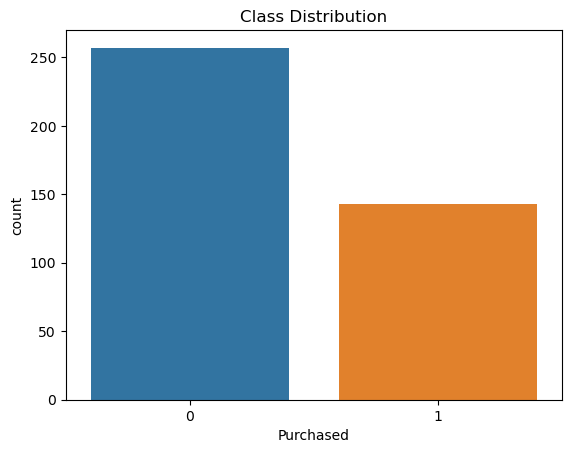

In [51]:
# Check class distribution
sns.countplot(x=df['Purchased'])
plt.title("Class Distribution")
plt.show()

In [52]:
X = df.iloc[:, 2:4]. values #Independent Variable
y = df.iloc[:, -1].values # Dependent Variable (Target Variable)

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [55]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [56]:
# Predict on Test data
y_pred = classifier.predict(x_test)
print("Predictions:", y_pred)

Predictions: [0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 1 1]


In [57]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.2f}")

Accuracy : 0.90


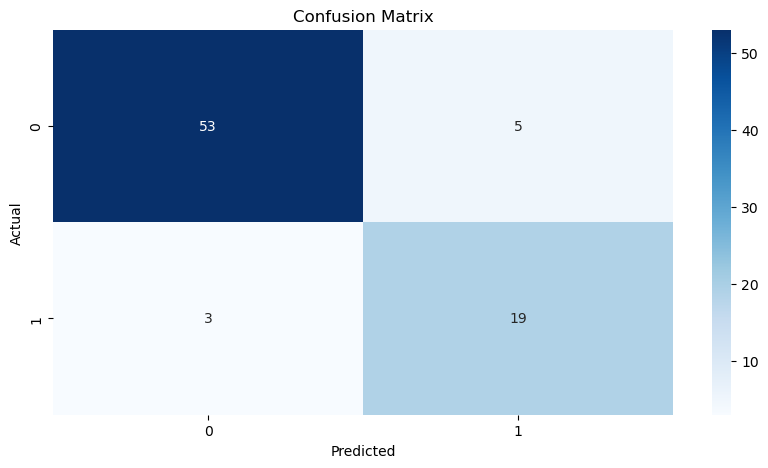

In [58]:
# Confusion Matrix
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()